In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

sns.set()
%matplotlib inline

## 1. Read and clean data

In [2]:
df23_i = pd.read_excel('data/2023-to-run-for-women-10k.xlsx')
df23_ii = pd.read_excel('data/2023-to-run-for-women-5k.xlsx')

In [3]:
df23 = pd.concat([df23_i,df23_ii])

In [4]:
df23.isna().sum()

Event             1620
Place             1620
Gun Time          1620
Race #            1620
Name                 0
Division          1620
Place/Gender      1620
Place/Division    1620
Chip Time         1620
dtype: int64

In [5]:
df23.shape

(3240, 9)

In [6]:
df24_i = pd.read_excel('data/2024-to-run-for-women-10k.xlsx')
df24_ii = pd.read_excel('data/2024-to-run-for-women-5k.xlsx')

In [7]:
df24 = pd.concat([df24_i,df24_ii])

In [8]:
df24.isna().sum()

Event             1922
Place             1922
Gun Time          1922
Race #            1922
Name                99
Division          2021
Place/Gender      2021
Place/Division    2021
Chip Time         1922
dtype: int64

In [9]:
# filter out non-name finishers
df24 = df24[~df24['Name'].isna()].copy()

In [10]:
# filter out name w/o location
df24 = df24[df24['Name'] != 'WINT, Carol'].copy()

In [11]:
df24.shape

(3844, 9)

In [12]:
def add_loc(df):
    df_loc = df[df['Event'].isna()].copy()
    df_loc.index = df_loc.index-1
    df_loc = df_loc['Name'].rename('Location')
    
    df = df[df['Event'].notna()].copy()
    
    df.reset_index(drop=True,inplace=True)
    df_loc.reset_index(drop=True, inplace=True)
    
    df = df.join(df_loc)
#     df = pd.concat([df,df_loc],axis=1)
    
    return df

In [13]:
df23 = add_loc(df23)

In [14]:
df23.shape

(1620, 10)

In [15]:
df24 = add_loc(df24)

In [16]:
df24.shape

(1922, 10)

## 2. Prep data

In [17]:
def get_demos(df):
    # Bradford, ON
    df['City'] = df['Location'].apply(lambda x: x.split(", ")[0])
    df['Province'] = df['Location'].apply(lambda x: x[-2:])
    # division: M2029
    df['Gender'] = df['Division'].apply(lambda x: x[0])
    df['Age'] = df['Division'].apply(lambda x: x[1:3]+'-'+x[3:])
    
    df.drop(columns=['Location'],inplace=True)
    
    return df

### 2024

In [18]:
df24 = get_demos(df24)

In [19]:
df24.head()

,Event,Place,Gun Time,Race #,Name,Division,Place/Gender,Place/Division,Chip Time,City,Province,Gender,Age
0,10K,1/517,00:37:26,20116.0,"CURRY, Luis",M2029,1/146,1/57,00:37:25,Bradford,ON,M,20-29
1,10K,2/517,00:37:31,17294.0,"RICHARD, Ryan",M3039,2/146,1/44,00:37:30,Toronto,ON,M,30-39
2,10K,3/517,00:37:39,16957.0,"VANLEEUWEN, Olivia",F2029,1/360,1/122,00:37:37,Guelph,ON,F,20-29
3,10K,4/517,00:40:12,17220.0,"ROSE, Jeremy",M2029,3/146,2/57,00:40:12,Toronto,ON,M,20-29
4,10K,5/517,00:40:18,22937.0,"DOIRON, Claire",F2029,2/360,2/122,00:40:18,Oshawa,ON,F,20-29


In [20]:
df24['Age'].value_counts()

20-29     533
30-39     533
40-49     356
50-59     243
-U-20     123
60-69      93
70-79      21
-O-PEN     17
80-89       3
Name: Age, dtype: int64

In [21]:
# filter out 17 runners w/ missing gender and age
df24 = df24[df24['Age']!='-O-PEN'].copy()

In [22]:
df24.head()

,Event,Place,Gun Time,Race #,Name,Division,Place/Gender,Place/Division,Chip Time,City,Province,Gender,Age
0,10K,1/517,00:37:26,20116.0,"CURRY, Luis",M2029,1/146,1/57,00:37:25,Bradford,ON,M,20-29
1,10K,2/517,00:37:31,17294.0,"RICHARD, Ryan",M3039,2/146,1/44,00:37:30,Toronto,ON,M,30-39
2,10K,3/517,00:37:39,16957.0,"VANLEEUWEN, Olivia",F2029,1/360,1/122,00:37:37,Guelph,ON,F,20-29
3,10K,4/517,00:40:12,17220.0,"ROSE, Jeremy",M2029,3/146,2/57,00:40:12,Toronto,ON,M,20-29
4,10K,5/517,00:40:18,22937.0,"DOIRON, Claire",F2029,2/360,2/122,00:40:18,Oshawa,ON,F,20-29


### 2023

In [23]:
df23 = get_demos(df23)

In [24]:
# filter out 14 runners w/ missing gender and age
df23 = df23[(df23['Gender']!='U')&(df23['Age']!='99-99')].copy()

In [25]:
df23.head()

,Event,Place,Gun Time,Race #,Name,Division,Place/Gender,Place/Division,Chip Time,City,Province,Gender,Age
0,10K,1/374,00:39:03,15946.0,"LEVIN, Eli",M3039,1/108,1/49,00:39:00,Toronto,ON,M,30-39
1,10K,2/374,00:39:13,16066.0,"SALEHI, Ellie",F3039,1/263,1/98,00:38:29,Markham,ON,F,30-39
2,10K,3/374,00:39:14,16065.0,"SALEHI, Fateme",F4049,2/263,1/58,00:38:28,Toronto,ON,F,40-49
3,10K,4/374,00:40:18,16126.0,"BANULS, Lorrain",M3039,2/108,2/49,00:40:15,Toronto,ON,M,30-39
4,10K,5/374,00:40:24,15342.0,"LAU, Jason",M2029,3/108,1/25,00:40:15,North York,ON,M,20-29


In [26]:
df23['Year'] = '2023'

In [27]:
df24['Year'] = '2024'

In [28]:
df = pd.concat([df23,df24])

In [29]:
df.reset_index(drop=True,inplace=True)

In [30]:
df.shape

(3510, 14)

## 3. Explore and find insights

In [31]:
df['Age'].value_counts()

30-39    1000
20-29     915
40-49     705
50-59     450
-U-20     218
60-69     177
70-79      41
80-89       4
Name: Age, dtype: int64

In [32]:
df['Age'] = df['Age'].astype('category')

In [33]:
df['Age'] = df['Age'].cat.rename_categories({'-U-20':'0-20'})

### 1) 300 more runners signed up in 2024, with more than 70% between 20 to 40 years old

In [34]:
df['Year'].value_counts()

2024    1905
2023    1605
Name: Year, dtype: int64

In [35]:
df[df['Year']=='2024'].groupby('Age')['Age'].count() - df[df['Year']=='2023'].groupby('Age')['Age'].count()

Age
0-20      28
20-29    151
30-39     66
40-49      7
50-59     36
60-69      9
70-79      1
80-89      2
Name: Age, dtype: int64

### 2) 10K continues to attract younger runners than the 5K

In [36]:
age = df.groupby(['Event','Age','Year'])['Age'].count().rename('Count').reset_index().pivot(index='Age',columns=['Event','Year'],values='Count')


In [37]:
age.reset_index(inplace=True)

In [38]:
age

Event    Age  10K        5K     
Year         2023 2024 2023 2024
0       0-20    8   25   87   98
1      20-29   88  179  294  354
2      30-39  147  150  320  383
3      40-49   78   71  271  285
4      50-59   34   54  173  189
5      60-69   13   22   71   71
6      70-79    3    5   17   16
7      80-89    0    0    1    3

In [39]:
age.loc[:, ('10K','2023_p')] = round(age.loc[:, ('10K','2023')]/age.loc[:, ('10K','2023')].sum()*100,1)
age.loc[:, ('10K','2024_p')] = round(age.loc[:, ('10K','2024')]/age.loc[:, ('10K','2024')].sum()*100,1)

In [40]:
age.loc[:, ('5K','2023_p')] = round(age.loc[:, ('5K','2023')]/age.loc[:, ('5K','2023')].sum()*100,1)
age.loc[:, ('5K','2024_p')] = round(age.loc[:, ('5K','2024')]/age.loc[:, ('5K','2024')].sum()*100,1)

In [41]:
age = age.set_index('Age')

### 2.1) 10K skewed younger in 2024 compared to 2023

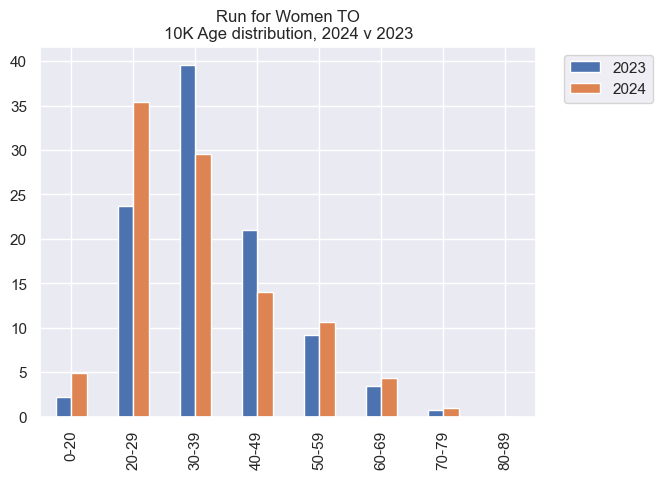

In [42]:
age['10K'].iloc[:,2:].plot(kind='bar',legend=True)
plt.title('Run for Women TO\n10K Age distribution, 2024 v 2023')
plt.legend(['2023','2024'],bbox_to_anchor=(1.25,1))
plt.xlabel('')
plt.show()

### 2.2) 5K skewed slightly younger as well, suggesting that more young runners signed up for both races

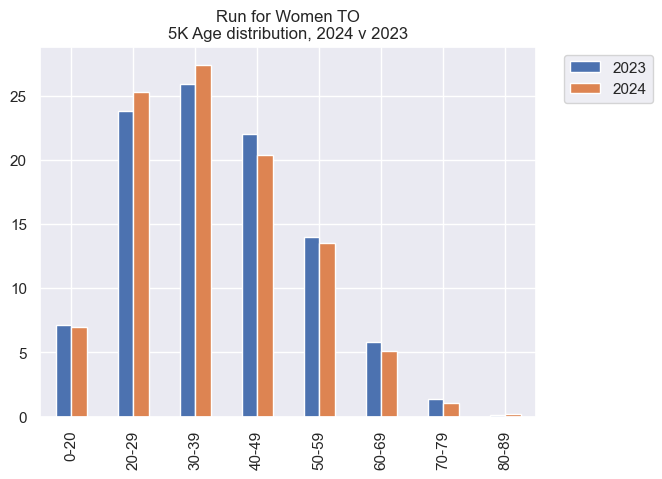

In [43]:
age['5K'].iloc[:,2:].plot(kind='bar',legend=True)
plt.title('Run for Women TO\n5K Age distribution, 2024 v 2023')
plt.legend(['2023','2024'],bbox_to_anchor=(1.25,1))
plt.xlabel('')
plt.show()

### 3) There was a similar distribution of males and females for 10K and 5K races in both years

In [44]:
df[df['Year']=='2023'].groupby(['Event','Gender'])['Gender'].count().rename('Count').reset_index()\
.pivot(index='Gender', columns='Event', values='Count').transform(lambda x: round(x/x.sum() * 100, 1))
# .rename('perc').reset_index()

Event,10K,5K
Gender,,
F,70.9,77.0
M,29.1,23.0


In [45]:
df[df['Year']=='2024'].groupby(['Event','Gender'])['Gender'].count().rename('Count').reset_index()\
.pivot(index='Gender', columns='Event', values='Count').transform(lambda x: round(x/x.sum() * 100, 1))
# .rename('perc').reset_index()

Event,10K,5K
Gender,,
F,71.1,75.5
M,28.9,24.5


## Finish Times

In [46]:
df.head()

,Event,Place,Gun Time,Race #,Name,Division,Place/Gender,Place/Division,Chip Time,City,Province,Gender,Age,Year
0,10K,1/374,00:39:03,15946.0,"LEVIN, Eli",M3039,1/108,1/49,00:39:00,Toronto,ON,M,30-39,2023
1,10K,2/374,00:39:13,16066.0,"SALEHI, Ellie",F3039,1/263,1/98,00:38:29,Markham,ON,F,30-39,2023
2,10K,3/374,00:39:14,16065.0,"SALEHI, Fateme",F4049,2/263,1/58,00:38:28,Toronto,ON,F,40-49,2023
3,10K,4/374,00:40:18,16126.0,"BANULS, Lorrain",M3039,2/108,2/49,00:40:15,Toronto,ON,M,30-39,2023
4,10K,5/374,00:40:24,15342.0,"LAU, Jason",M2029,3/108,1/25,00:40:15,North York,ON,M,20-29,2023


In [47]:
df['Gun Time_dt'] = pd.to_timedelta(df['Gun Time'].astype(str))

In [48]:
# df['Gun Time_m'] = round((df['Gun Time_dt'].dt.hour*3600 + df['Gun Time_dt'].dt.minute*60 + df['Gun Time_dt'].dt.second)/60, 1)


In [49]:
df['Gun Time_m'] = round(df['Gun Time_dt'].dt.seconds/60,1)

In [50]:
pd.set_option('display.max_rows', 100)

In [51]:
df.head()

,Event,Place,Gun Time,Race #,Name,Division,Place/Gender,Place/Division,Chip Time,City,Province,Gender,Age,Year,Gun Time_dt,Gun Time_m
0,10K,1/374,00:39:03,15946.0,"LEVIN, Eli",M3039,1/108,1/49,00:39:00,Toronto,ON,M,30-39,2023,0 days 00:39:03,39.0
1,10K,2/374,00:39:13,16066.0,"SALEHI, Ellie",F3039,1/263,1/98,00:38:29,Markham,ON,F,30-39,2023,0 days 00:39:13,39.2
2,10K,3/374,00:39:14,16065.0,"SALEHI, Fateme",F4049,2/263,1/58,00:38:28,Toronto,ON,F,40-49,2023,0 days 00:39:14,39.2
3,10K,4/374,00:40:18,16126.0,"BANULS, Lorrain",M3039,2/108,2/49,00:40:15,Toronto,ON,M,30-39,2023,0 days 00:40:18,40.3
4,10K,5/374,00:40:24,15342.0,"LAU, Jason",M2029,3/108,1/25,00:40:15,North York,ON,M,20-29,2023,0 days 00:40:24,40.4


### 5) The avg. for the 5K was ~49 mins whereas for the 10K was ~64 mins

### 5.1) There was a standard deviation of 15 mins for the 5K compared to 12 mins for the 10K suggesting that a wider range of runners ran the 5K than the 10K

In [52]:
df24_ = df[df['Year']=='2024'].copy()

In [53]:
df24_[(df24_['Event']=='5K')&(df24_['Year']=='2024')]['Gun Time_m'].describe()

count    1399.000000
mean       48.453753
std        14.828443
min        18.800000
25%        35.750000
50%        46.400000
75%        62.050000
max        82.700000
Name: Gun Time_m, dtype: float64

In [54]:
df24_[(df24_['Event']=='10K')&(df24_['Year']=='2024')]['Gun Time_m'].describe()

count    506.000000
mean      63.550791
std       11.719212
min       37.400000
25%       55.100000
50%       62.550000
75%       70.300000
max      110.100000
Name: Gun Time_m, dtype: float64

### 5.2) The 5K was finished in 20 to 80 mins, whereas the 10K took between 40 and 120 mins

In [55]:
sns.set_palette('Dark2')

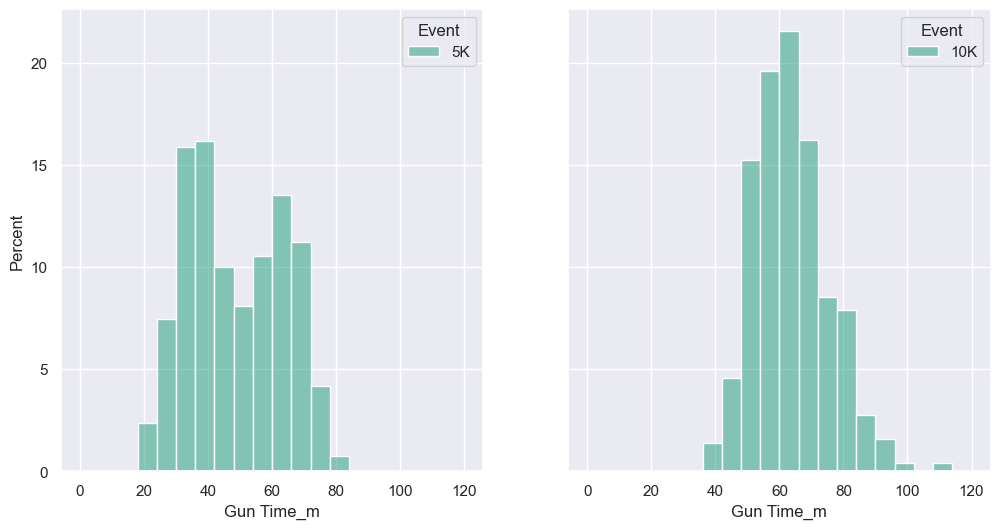

In [56]:
fig, ax = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)

sns.histplot(x='Gun Time_m', hue='Event', data=df24_[df24_['Event']=='5K'], ax=ax[0], stat='percent',bins=20,binrange=(0,120))
sns.histplot(x='Gun Time_m', hue='Event', data=df24_[df24_['Event']=='10K'], ax=ax[1], stat='percent',bins=20,binrange=(0,120))

plt.show()

### 5.3) There was no significant difference in finishing times in 5K and 10K in 2023 and 2024

In [57]:
sns.set_palette('tab20')

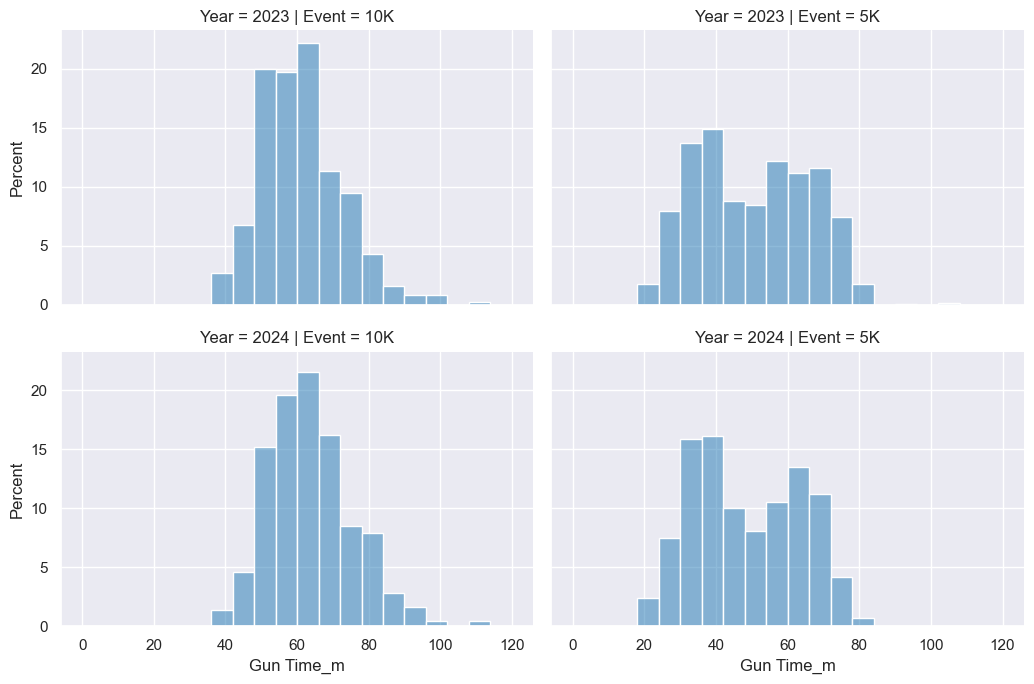

In [58]:
g = sns.FacetGrid(data=df,row='Year',col='Event', sharey=True, height=3.5, aspect=1.5)
g.map_dataframe(sns.histplot, x='Gun Time_m', stat='percent', hue='Year',bins=20,binrange=(0,120))

### 6) Woodbridge had the fastest runners in the 5K while Sauga was the winner in the 10K

In [59]:
df['Chip Time_dt'] = pd.to_timedelta(df['Chip Time'].astype(str))

In [60]:
df['Chip Time_m'] = round(df['Chip Time_dt'].dt.seconds/60,1)

<Axes: >

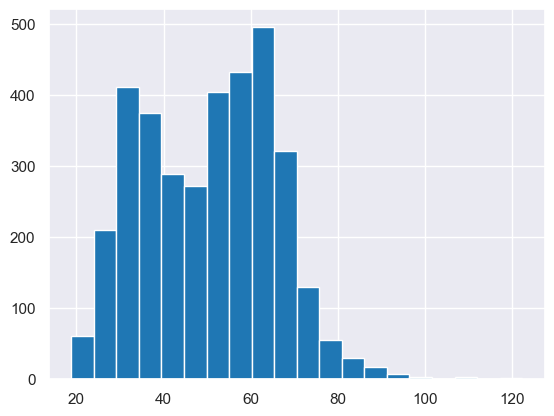

In [61]:
df['Chip Time_m'].hist(bins=20)

In [62]:
df24_ = df[df['Year']=='2024'].copy()

In [63]:
cities = df24_.groupby(['City','Event'])['Chip Time_m'].agg({'mean','count'}).reset_index()

In [64]:
# cities['count'].hist(range=(0,100),bins=20)

In [65]:
top_cities = cities[cities['count']>=10].copy()

In [66]:
top_cities = top_cities.pivot(index='City',columns='Event',values='mean').round(1)

In [67]:
top_cities['5K'].sort_values()[:5]

City
 Woodbridge       38.8
 Oakville         39.3
 Toronto          45.4
 Richmond Hill    46.1
 Markham          47.2
Name: 5K, dtype: float64

In [68]:
top_cities['10K'].sort_values()[:5]

City
 Mississauga    58.8
 Oakville       59.4
 Etobicoke      61.5
 Toronto        61.9
 North York     62.0
Name: 10K, dtype: float64

### 7) Male runners are ~2m/k faster than female runners across age groups

### 7.1) Male runners are 1m/k faster than female runners between 20-39, and 1.7m/k faster in the 40-49 age group

In [69]:
df['dist'] = (df['Event'].apply(lambda x: x[:-1])).astype(int)

In [70]:
df['pace'] = df['Chip Time_m']/df['dist']

In [71]:
pace_div = df.groupby(['Age','Gender'])['pace'].median().reset_index()

In [72]:
pace_div = pace_div.pivot(index='Age',columns='Gender',values='pace')

In [73]:
pace_div['diff'] = pace_div['M']-pace_div['F']

In [74]:
# sns.heatmap(pace_div.iloc[:,:2],annot=True,square=True,cbar=False,vmin=6,vmax=10)

In [75]:
pace_div.round(1)

Gender,F,M,diff
Age,,,
0-20,7.8,6.6,-1.1
20-29,7.2,6.2,-1.0
30-39,7.7,6.7,-1.0
40-49,8.6,7.0,-1.7
50-59,8.9,9.6,0.7
60-69,10.1,7.3,-2.7
70-79,12.3,6.6,-5.7
80-89,11.5,NaN,NaN


In [76]:
pace_div['diff'].mean()

-1.795

In [77]:
pace_div_best = df.groupby(['Age','Gender'])['pace'].min().reset_index()

In [78]:
pace_div_best = pace_div_best.pivot(index='Age',columns='Gender',values='pace')

In [79]:
pace_div_best['diff'] = pace_div_best['M']-pace_div_best['F']

In [80]:
pace_div_best.round(1)

Gender,F,M,diff
Age,,,
0-20,3.8,4.0,0.1
20-29,3.8,3.7,-0.0
30-39,3.1,3.8,0.7
40-49,3.8,4.6,0.7
50-59,3.9,3.1,-0.7
60-69,5.0,4.2,-0.8
70-79,5.3,5.5,0.2
80-89,10.8,NaN,NaN


<Axes: xlabel='Age', ylabel='pace'>

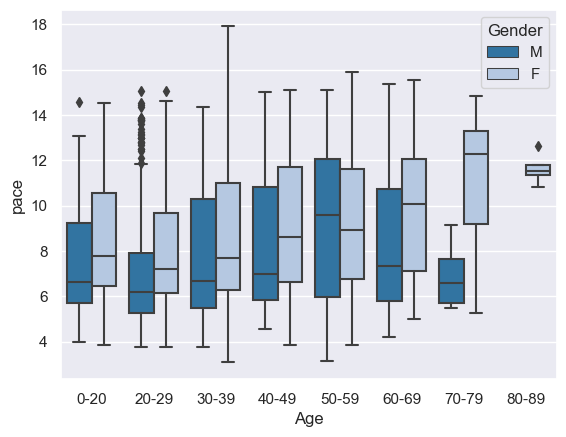

In [81]:
sns.boxplot(x='Age',y='pace',data=df,hue='Gender')

### LD runners

In [82]:
pd.set_option('display.max_columns',100)

In [83]:
ld_runners = pd.read_csv('data/ld_runners.txt',header=None,delimiter=',').transpose()

In [84]:
ld_runners = ld_runners[0].tolist()

In [85]:
df['Name'] = df['Name'].str.title()

In [86]:
df_ld_runners = pd.Series(ld_runners).apply(lambda x: x.split(' ')[1]+', '+x.split(' ')[0])

In [87]:
ld_times = df[df['Name'].isin(df_ld_runners.tolist())].copy()

In [88]:
ld_times.sort_values(by='pace',inplace=True)

In [89]:
ld_results = ld_times.groupby(['Name','Year'])['pace'].mean().reset_index()

In [90]:
ld_results = ld_results.pivot(index='Name',columns='Year',values='pace')

In [91]:
ld_results.sort_values(by='2024',inplace=True)

In [92]:
ld_results = ld_results.fillna('')

In [93]:
ld_results.to_clipboard()